In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [45]:
df = pd.read_csv("Crop_recommendation.csv")

In [46]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


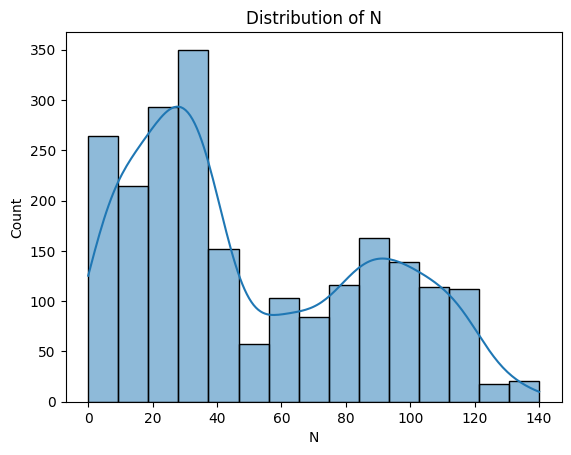

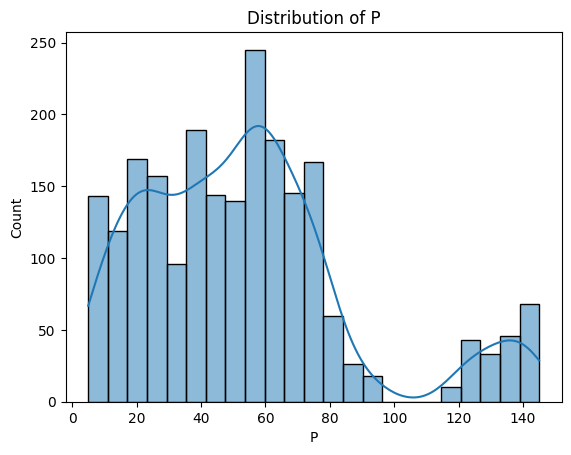

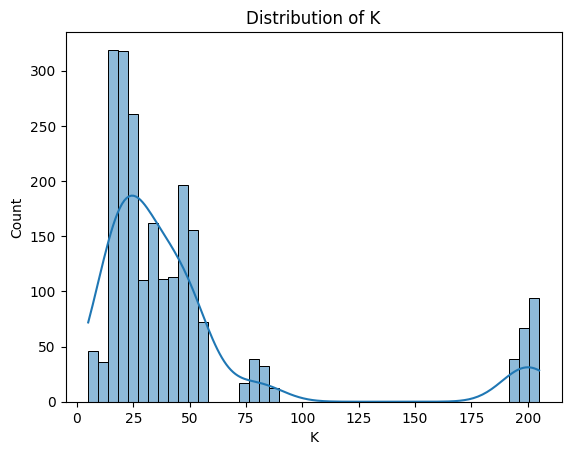

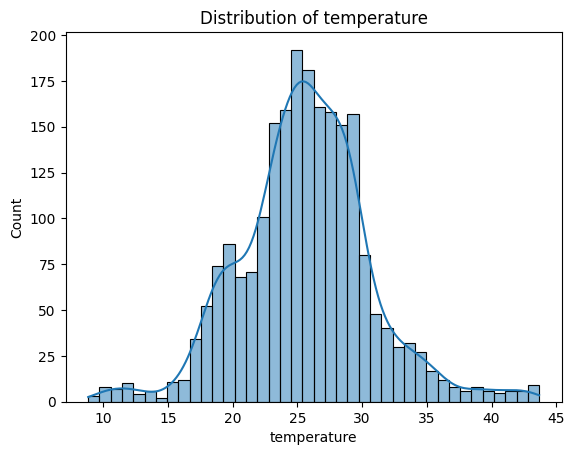

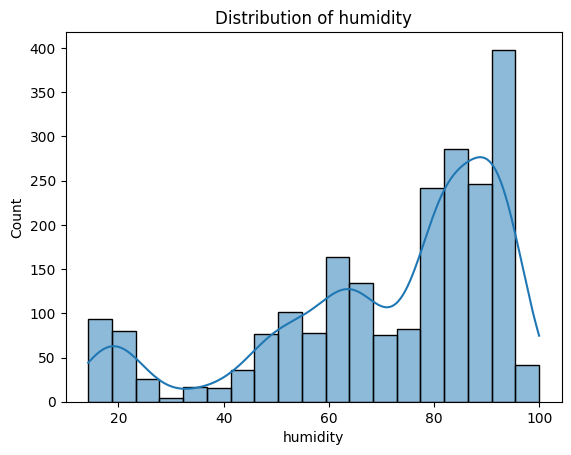

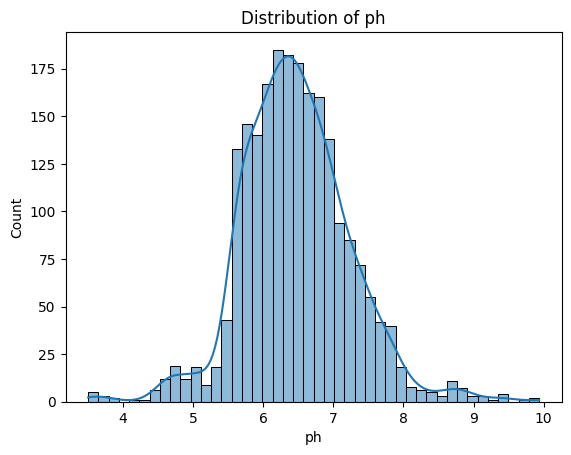

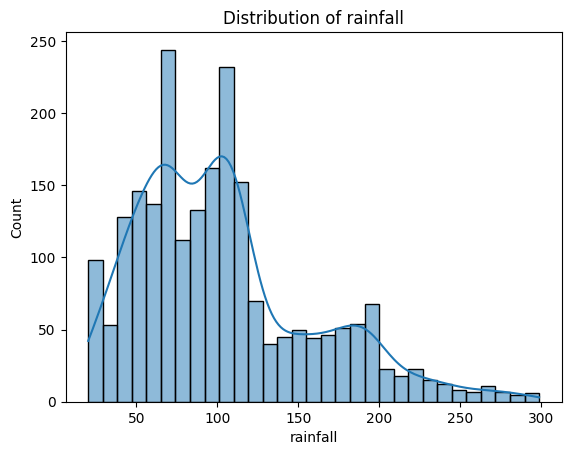

In [47]:
for col in df.drop('label', axis = 1).columns.tolist():
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()


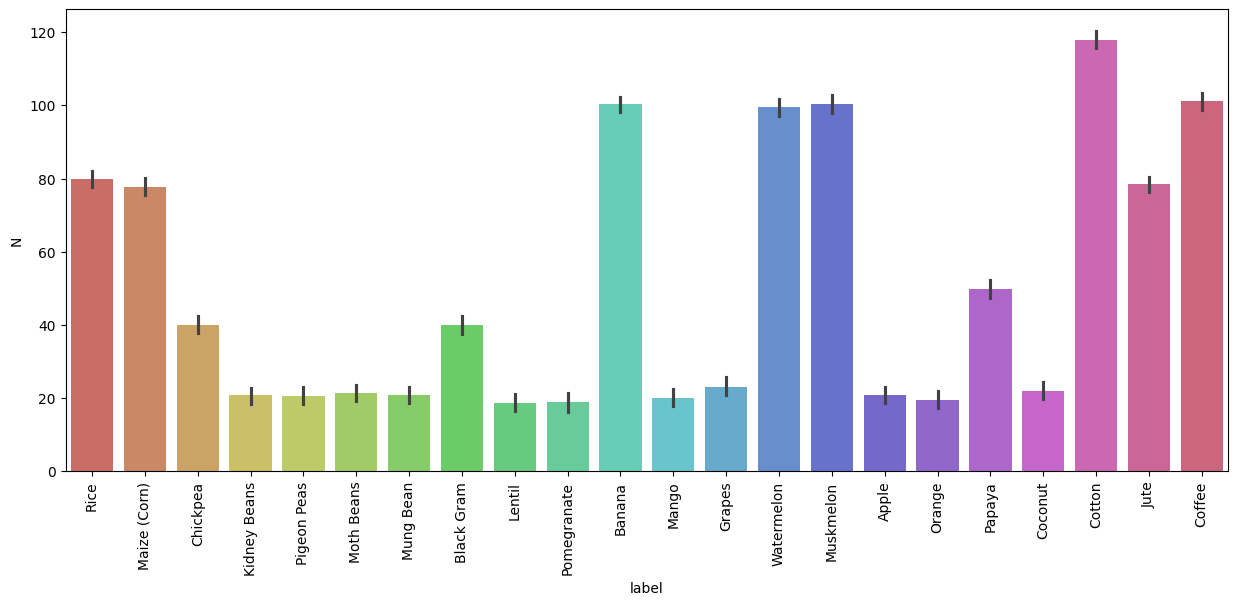

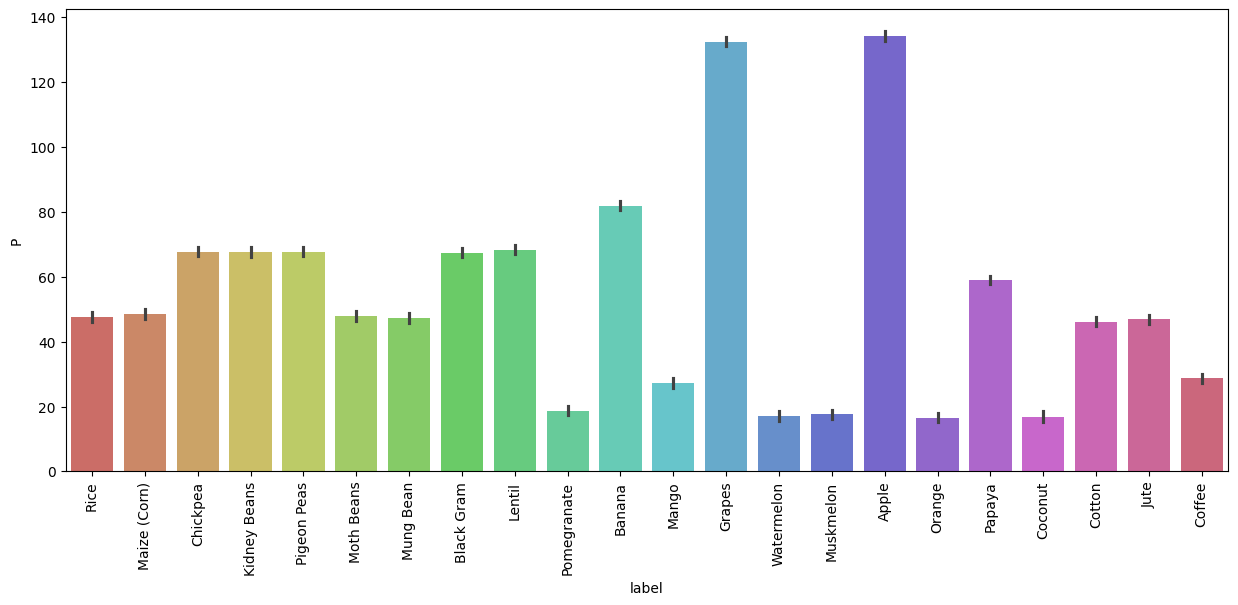

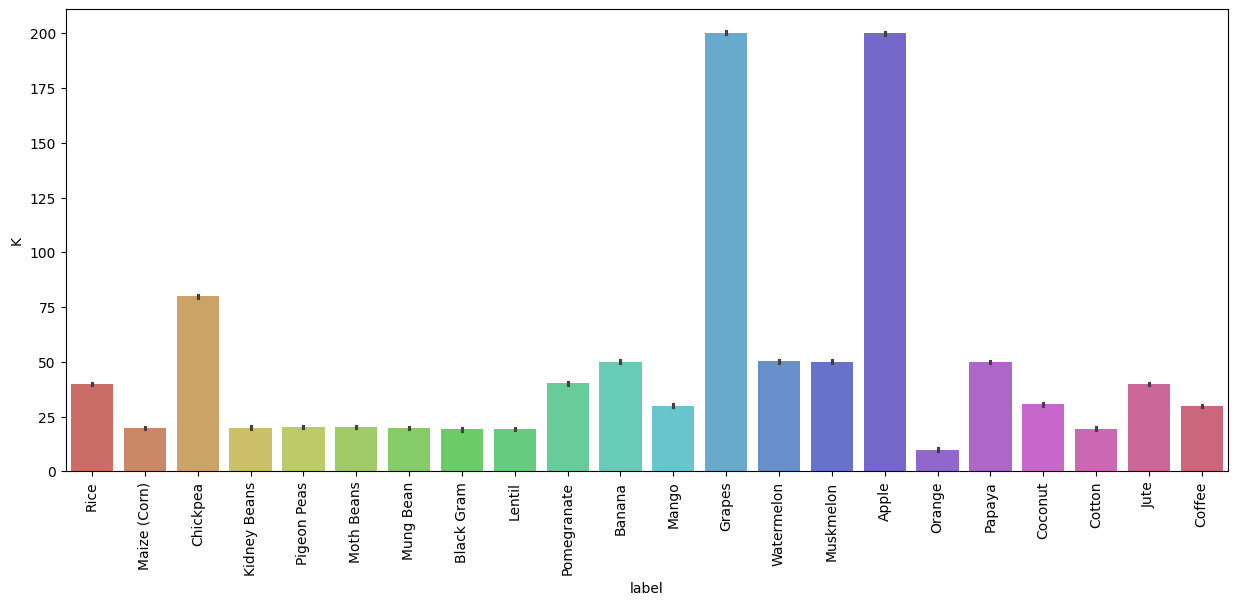

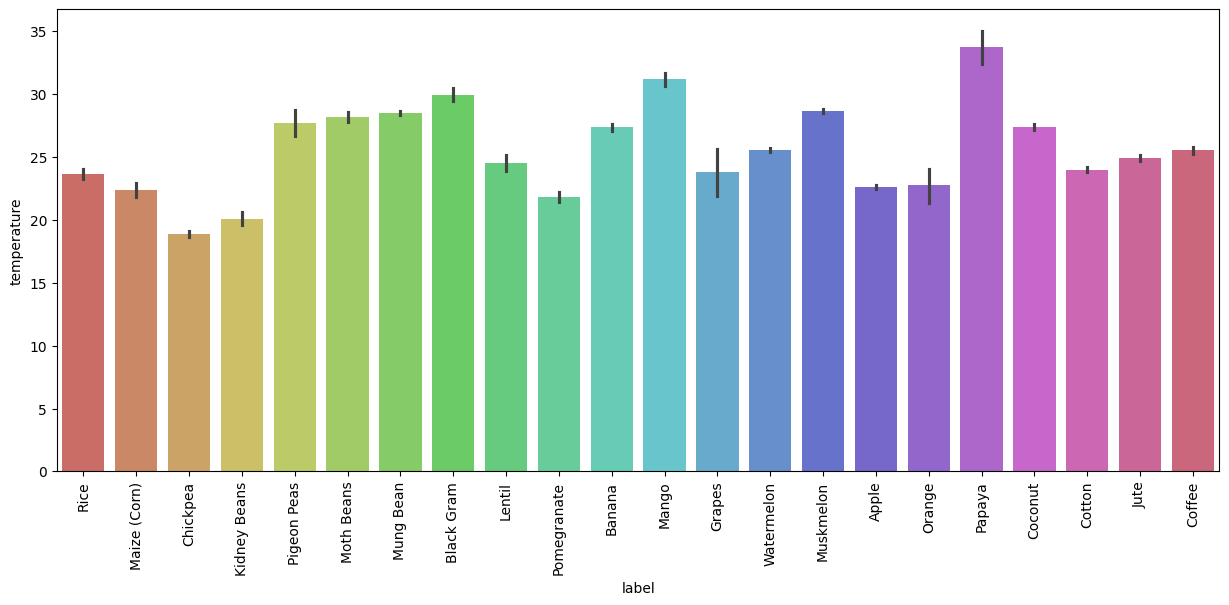

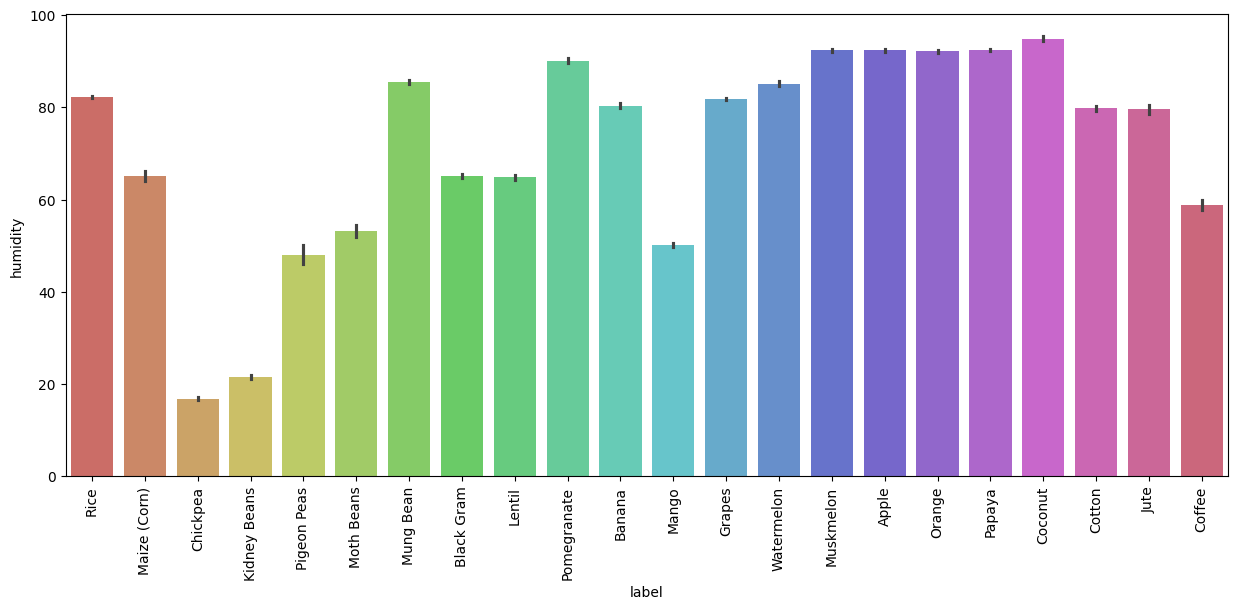

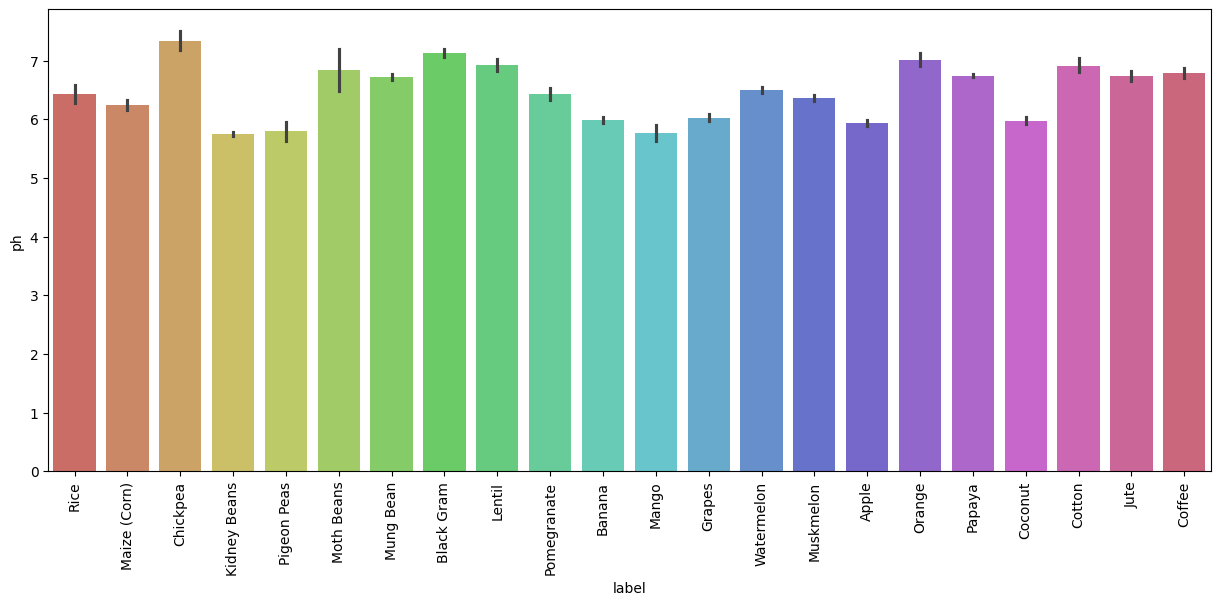

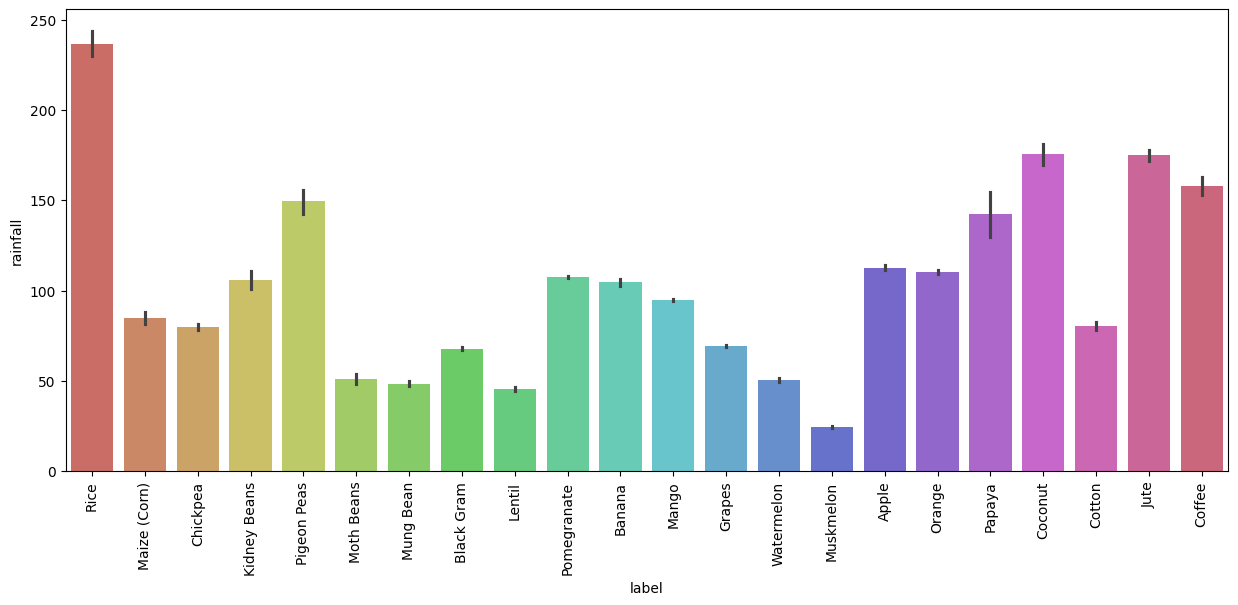

In [70]:
#bar-plots

for i in df.drop(columns='label', axis=1):
    plt.figure(figsize = (15,6))
    sns.barplot(x='label', y=i, data= df, palette='hls', hue='label')
    plt.xticks(rotation = 90)
    plt.show()

In [48]:
proper_name_mapping = {
    'rice': 'Rice',
    'maize': 'Maize (Corn)',
    'chickpea': 'Chickpea',
    'kidneybeans': 'Kidney Beans',
    'pigeonpeas': 'Pigeon Peas',
    'mothbeans': 'Moth Beans',
    'mungbean': 'Mung Bean',
    'blackgram': 'Black Gram',
    'lentil': 'Lentil',
    'pomegranate': 'Pomegranate',
    'banana': 'Banana',
    'mango': 'Mango',
    'grapes': 'Grapes',
    'watermelon': 'Watermelon',
    'muskmelon': 'Muskmelon',
    'apple': 'Apple',
    'orange': 'Orange',
    'papaya': 'Papaya',
    'coconut': 'Coconut',
    'cotton': 'Cotton',
    'jute': 'Jute',
    'coffee': 'Coffee'
}

df['label'] = df['label'].map(proper_name_mapping)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


<Axes: >

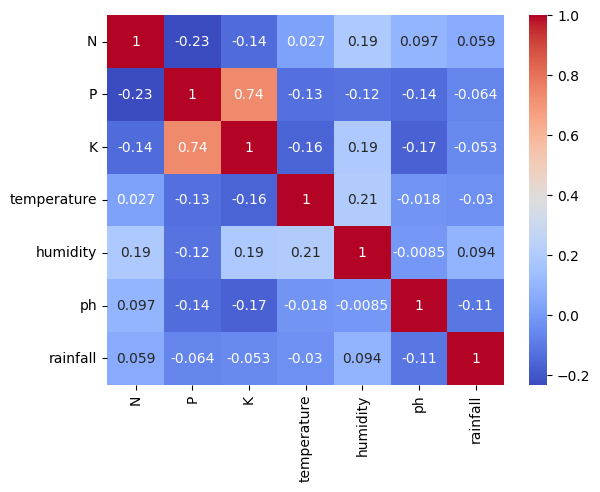

In [49]:

new_df = df[['N','P','K','temperature','humidity','ph','rainfall']]
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [50]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [51]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [52]:
acc = []
model = []

In [53]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(metrics.classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       0.59      1.00      0.74        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       0.91      1.00      0.95        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.74      0.93      0.83        28
Kidney Beans       0.00      0.00      0.00        14
      Lentil       0.68      1.00      0.81        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       0.00      0.00      0.00        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00   

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [54]:
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)

In [55]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [56]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(metrics.classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       1.00      1.00      1.00        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.88      1.00      0.93        28
Kidney Beans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       1.00      1.00      1.00        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00  

In [57]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [58]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(metrics.classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
  Black Gram       0.94      1.00      0.97        16
    Chickpea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.90      1.00      0.95        28
Kidney Beans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
  Moth Beans       1.00      0.95      0.97        19
   Mung Bean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00 

C:\Users\asus\AppData\Local\Temp\ipykernel_23708\2546173102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark',)


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

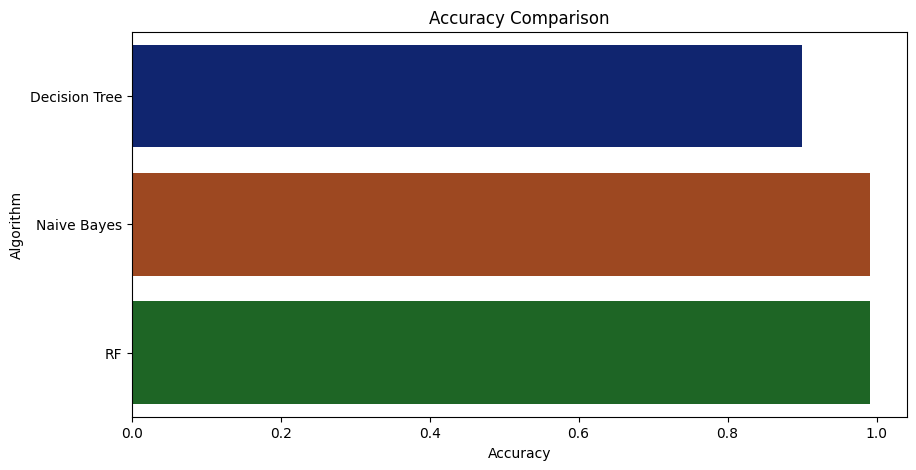

In [59]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark',)

In [71]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['Coffee']


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [79]:
data = np.array([[44.23467,0.00645, 102.29677, 31.29613, 48.53832, 4.31944 , 45.56276]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Watermelon']


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [82]:
data = np.array([[44.23467,0.00645, 102.29677, 31.29613, 48.53832, 4.31944 , 45.56276]])
prediction = RF.predict(data)
print(prediction)

['Chickpea']


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
data = np.array([[81.99785 ,81.59317 , 37.83783 , 32.16449, 61.26591, 3.11226 , 69.57334 ]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Pigeon Peas']


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
